In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ch4_scores400.csv')
df.shape

(400, 1)

In [3]:
df.head()

,score
0,76
1,55
2,80
3,80
4,74


In [4]:
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

## 4.1 모집단과 표본

In [5]:
np.random.choice([1, 2, 3], 3)

array([3, 2, 2])

In [6]:
np.random.choice([1, 2, 3], 3, replace=False)

array([2, 3, 1])

In [7]:
np.random.seed(0)
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

In [8]:
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

70.4

In [9]:
scores.mean()

69.53

In [10]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1} 번째 무작위 추출로 얻은 표본 평균', sample.mean())

1 번째 무작위 추출로 얻은 표본 평균 72.45
2 번째 무작위 추출로 얻은 표본 평균 63.7
3 번째 무작위 추출로 얻은 표본 평균 66.05
4 번째 무작위 추출로 얻은 표본 평균 71.7
5 번째 무작위 추출로 얻은 표본 평균 74.15


## 4.2 확률 모형

### 4.2.1 확률의 기본

### 4.2.2 확률분포

In [11]:
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [12]:
np.random.choice(dice, p=prob)

1

In [13]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])

In [14]:
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'frequency': freq,
              'relative frequency': freq / num_trial},
             index=pd.Index(np.arange(1, 7), name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


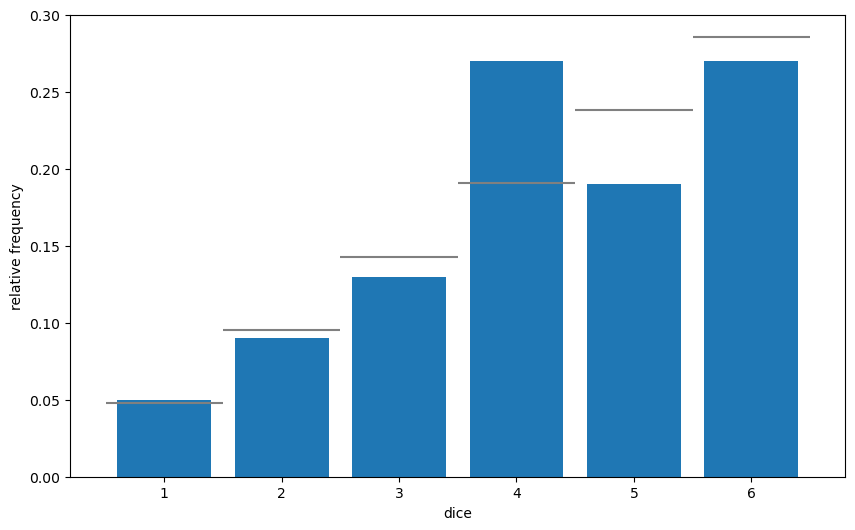

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)

ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')

ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

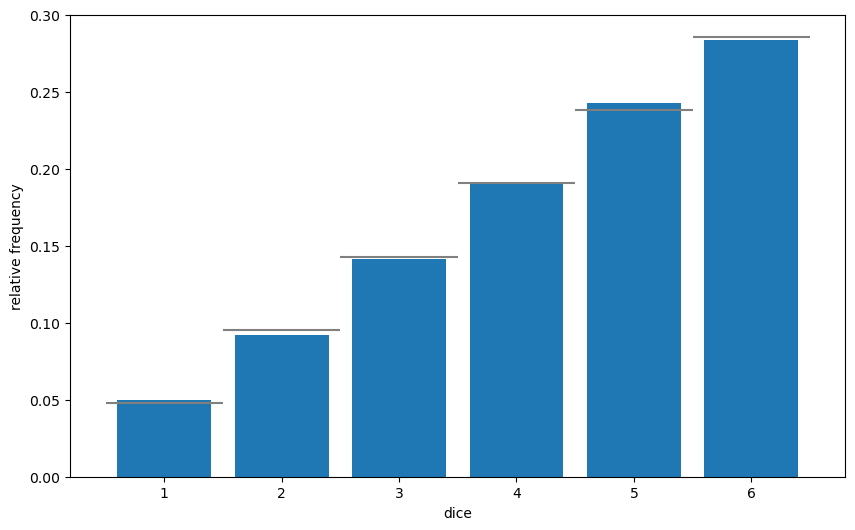

In [16]:
num_trial = 10000
sample = np.random.choice(dice, num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 4.3 추측통계의 확률

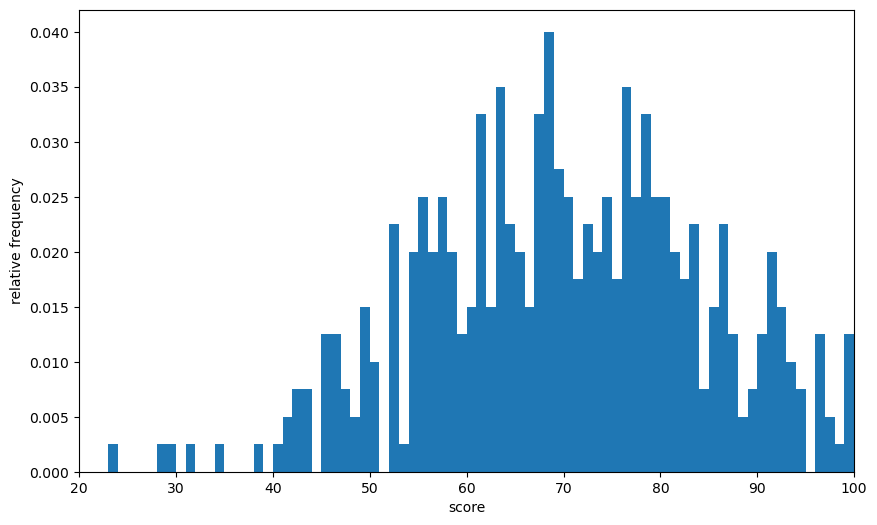

In [18]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [19]:
np.random.choice(scores)

89

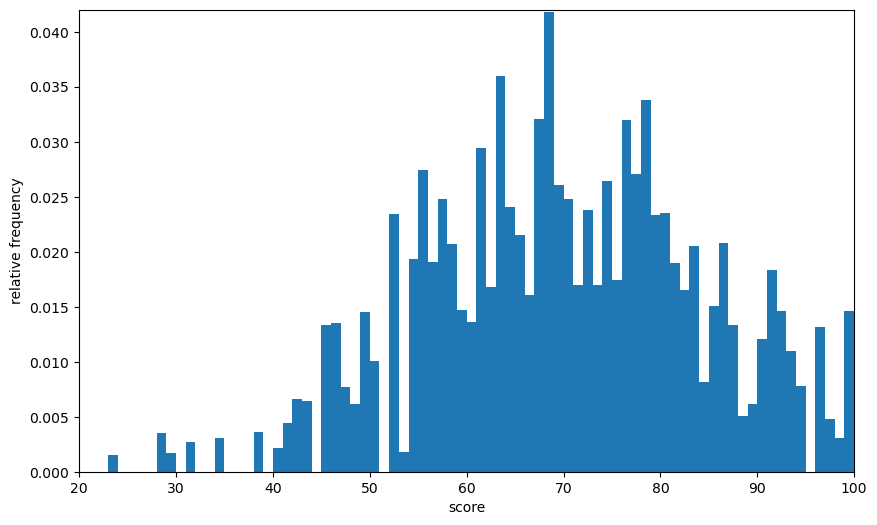

In [21]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

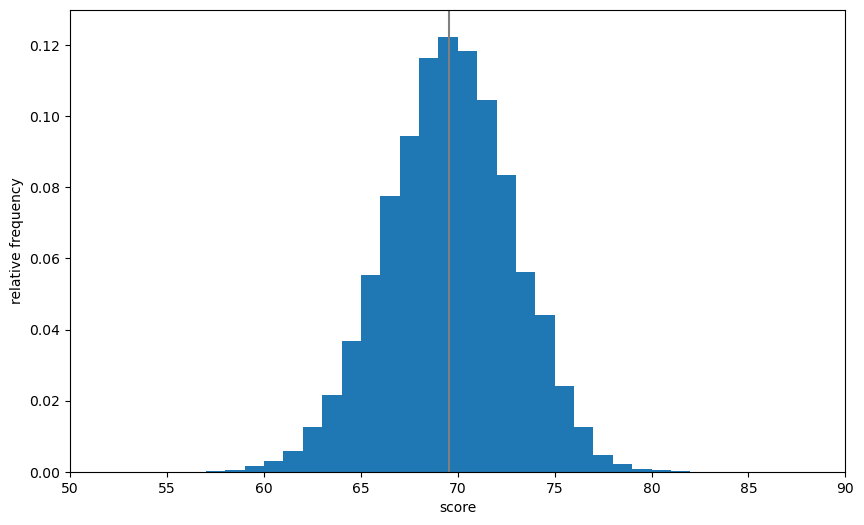

In [24]:
sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)

# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')

ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()